#  <span style="color:rgb(50,100,100);"><strong>&#128304; 1. Definicion de Objetivos &#128304;</strong></span>

Evaluar el crecimiento de la cartera de clientes de la empresa y determinar las tasas de crecimiento históricas.

Identificar los clientes más rentables

Identificar regiones de oportunidad donde la empresa tiene una oportunidad de crecimiento significativa.

Desarrollar estrategias para retener y expandir la cartera de clientes.

Preguntas a tener en cuenta para dicho analisis.

&#11093;¿Cuál es el tipo de operación más frecuente?¿Existen algunos tipos de operaciones que sean más comunes que otros?

&#11093;¿Hay una tendencia o patrón en la facturación?¿La facturación está aumentando o disminuyendo con el tiempo? ¿Existen costos significativamente diferentes a otros? ¿que clientes son mas rentables y cual no?


#  <span style="color:rgb(50,100,100);"><strong>&#128304; 2. Contexto y Problema Comercial &#128304;</strong></span>

<em> 
La empresa ECOLOGISTICA se dedica a ofrecer servicios de envío y logística a nivel nacional. En su operación diaria, la empresa realiza diferentes tipos de operaciones para sus clientes, desde el transporte de paquetes y distribución de productos. Además, la empresa se enfrenta a desafíos relacionados con la facturación y la rentabilidad, así como con la duración de los envíos a diferentes zonas de destino.

Uno de los problemas que la empresa enfrenta es la falta de información detallada sobre el tipo de operación más frecuente que realiza, lo que dificulta la toma de decisiones informadas sobre su operación diaria y su rentabilidad. Además, la empresa no cuenta con un análisis exhaustivo de la facturación y los costos, lo que dificulta la identificación de los costos más significativos y los clientes más rentables. Asimismo, la empresa enfrenta el desafío de determinar cómo varía la duración de los envíos según la zona de destino, lo que afecta la satisfacción del cliente y la rentabilidad de la empresa.

Para abordar estos problemas, es necesario llevar a cabo un análisis detallado de la operación diaria de la empresa, recopilar y analizar los datos de facturación y costos, y analizar cómo varía la duración de los envíos según la zona de destino. De esta manera, la empresa podrá tomar decisiones informadas sobre su operación diaria, identificar las áreas de mejora en su rentabilidad y satisfacer mejor las necesidades de sus clientes.
</em> 

## ⏩ **2.1 Audiencia**

**La alta dirección de la empresa:** *informar los resultados del análisis y las recomendaciones para mejorar la rentabilidad y la satisfacción del cliente.*

**Los departamentos de operaciones y logística:** *mejorar la eficiencia y la efectividad de los procesos de operaciones y logística.*

**Los analistas de datos y finanzas:** *proporcionar una descripción detallada del análisis de datos y los resultados financieros.*

**Los inversores y accionistas:** *informar sobre la rentabilidad y el desempeño financiero de la empresa.*

# <span style="color:rgb(50,100,100);"><strong>&#128304;3. Exploratory Data Analysis (EDA) & Data Wrangling (Munging):&#128304;</strong></span>

&#11093; En esta etapa, se llevará a cabo una exploración detallada de los datos para comprender mejor su estructura y contenido. Algunos aspectos que se abordarán son:

  💡Análisis de la distribución de las variables numéricas

  💡Análisis de las relaciones entre las variables

  💡Análisis de la distribución de las categorías de las variables categóricas

  💡Identificación de valores atípicos y valores faltantes




## ⏩ **3.1 Primeros pasos**

### 🔍 **3.1.1 Intalacion de las librerias**

In [1]:
#Cargamos las librerías
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###🔍 **3.1.2 Tabla calendario**

In [3]:
#Creamos una tabla calendario
import locale
from datetime import datetime, timedelta

# Definir el rango de fechas para la tabla calendario
inicio = datetime(2021, 1, 1)
fin = datetime(2023, 12, 31)

# Crear un DataFrame con todas las fechas del rango
calendar = pd.DataFrame(pd.date_range(inicio, fin), columns=['fecha_cl'])

# Agregar las columnas de día, nombre del día, mes, nombre del mes y año
calendar['dia'] = calendar['fecha_cl'].dt.day
calendar['nombre_dia'] = calendar['fecha_cl'].dt.day_name()
calendar['mes'] = calendar['fecha_cl'].dt.month
calendar['nombre_mes'] = calendar['fecha_cl'].dt.month_name()
calendar['anio'] = calendar['fecha_cl'].dt.year

# Mostrar las primeras 10 filas de la tabla calendario
calendar.head(10)

,fecha_cl,dia,nombre_dia,mes,nombre_mes,anio
0,2021-01-01,1,Friday,1,January,2021
1,2021-01-02,2,Saturday,1,January,2021
2,2021-01-03,3,Sunday,1,January,2021
3,2021-01-04,4,Monday,1,January,2021
4,2021-01-05,5,Tuesday,1,January,2021
5,2021-01-06,6,Wednesday,1,January,2021
6,2021-01-07,7,Thursday,1,January,2021
7,2021-01-08,8,Friday,1,January,2021
8,2021-01-09,9,Saturday,1,January,2021
9,2021-01-10,10,Sunday,1,January,2021


### 🔍 **3.1.3 Importamos el data set**

In [4]:
#cargamos el dataset con el que vamos a trabajar
url_postal2022int='https://drive.google.com/file/d/1xO1EDGJlxtfJWOMUGu27fOHMar3rTilo/view'
path_postal2022int= 'https://drive.google.com/uc?export=download&id='+ url_postal2022int.split('/')[-2]
postal=pd.read_csv(path_postal2022int, delimiter=";", encoding="latin-1", low_memory=False)

postal.head()

,id,cliente_id,empresa,tipo_operacion,grupo,estado,peso,bultos,fecha_hora,fechaplanilla,fecha_hora_entrega,fecha_ultimo_estado,Indice_inflacion_%,tipo_cambio_USD_oficial,precio_USD_oficial,precio,costo_adicional1,costo_distribuidor,costo_transporte,costo_interno,guias_bio,destino_zona,origen_zona,tipo_guia,movimiento,destino_cp,destino_localidad,destino_provincia,destino_region,origen_cp,origen_localidad,origen_provincia,origen_region
0,2202100,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,14/1/2022 14:54,13/1/2022 00:00,14/1/2022 00:00,14/1/2022 00:00,"3,88%","108,75",0,0,0,"277,2",0,"143,5",0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA
1,2220301,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,21/1/2022 16:13,20/1/2022 00:00,21/1/2022 00:00,21/1/2022 00:00,"3,88%","109,25",0,0,0,"277,2",0,0,0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA
2,2237773,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,28/1/2022 14:20,27/1/2022 00:00,28/1/2022 00:00,28/1/2022 00:00,"3,88%","110,25",0,0,0,"277,2",0,0,0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA
3,2237781,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,28/1/2022 14:20,27/1/2022 00:00,28/1/2022 00:00,28/1/2022 00:00,"3,88%","110,25",0,0,0,"277,2",0,0,0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA
4,2271223,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,11/2/2022 10:47,14/2/2022 00:00,15/2/2022 00:00,15/2/2022 00:00,"4,69%","111,25",0,0,0,"277,2",0,157,0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA


##⏩ **3.2 EDA & Munging**

### **🔍 3.2.1 Distribuciones de variables**

In [5]:
print(f'\t El dataset tiene {postal.shape[0]} filas y {postal.shape[1]} columnas. \n')

	 El dataset tiene 128119 filas y 33 columnas. 



In [6]:
duplicados=postal.drop_duplicates()
print(duplicados.shape)

(128119, 33)


No hay duplicados

In [7]:
#vistas de las nomenclaturas de columnas
postal.columns

Index(['id', 'cliente_id', 'empresa', 'tipo_operacion', 'grupo', 'estado',
       'peso', 'bultos', 'fecha_hora', 'fechaplanilla', 'fecha_hora_entrega',
       'fecha_ultimo_estado', 'Indice_inflacion_%', 'tipo_cambio_USD_oficial',
       'precio_USD_oficial', 'precio', 'costo_adicional1',
       'costo_distribuidor', 'costo_transporte', 'costo_interno', 'guias_bio',
       'destino_zona', 'origen_zona', 'tipo_guia', 'movimiento', 'destino_cp',
       'destino_localidad', 'destino_provincia', 'destino_region', 'origen_cp',
       'origen_localidad', 'origen_provincia', 'origen_region'],
      dtype='object')

In [8]:
#Miramos sus variable, el tipo que son y si tienen nulls
postal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128119 entries, 0 to 128118
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       128119 non-null  int64  
 1   cliente_id               128119 non-null  int64  
 2   empresa                  128119 non-null  object 
 3   tipo_operacion           128119 non-null  object 
 4   grupo                    128119 non-null  object 
 5   estado                   128119 non-null  object 
 6   peso                     127484 non-null  float64
 7   bultos                   128119 non-null  int64  
 8   fecha_hora               128119 non-null  object 
 9   fechaplanilla            123973 non-null  object 
 10  fecha_hora_entrega       118197 non-null  object 
 11  fecha_ultimo_estado      126483 non-null  object 
 12  Indice_inflacion_%       128119 non-null  object 
 13  tipo_cambio_USD_oficial  128119 non-null  object 
 14  prec

####🔦 **3.2.1.1 Descrpcion de las variables**

**'id'** : "Clave que identifica la guia de operación"

**'cliente_id'** : "Clave que identifica a la empresa cliente"

**'empresa'** : "Nombre de la empresa cliente"

**'tipo_operacion'** : " Variable que identifica el tipo de operación (Retiro, Entrega…)

**'grupo'** : "Cada estado del servicio corresponde a un grupo, esta variable muestra a que grupo corresponde cada estado"

**'estado'** : "estado en el que se encuentra la guia de operacion"

**'peso'** : "peso en kg de envio"

**'bultos'** : "muestra la cantidad bultos que conforman la guia de operación"

**'fecha_hora'** : "fecha de creacion de la guia de operación"

**'fechaplanilla'** : "fecha de despacho de la guia de operación"

**'fecha_hora_entrega'** : "fecha de entrega de la guia de operación"

**'fecha_ultimo_estado'** : "fecha del ultimo movimiento registradoen la guia de operación"

**'Indice_inflacion_% '** : "Indice de inflacion mensual segun INDEC"

**'tipo_cambio_USD_oficial'** : "valor dorlar segun Banco Nacion Argentino"

**'precio_USD_oficial'** : "precio de venta equivalente en dolares segun Banco Nacion Argentino"

**'precio'** : "precio de venta del servicio contratado en la guia de operación"

**'costo_adicional1'** : "costo adicional de la guia de operación"

**'costo_distribuidor'** : "costo de distribucion de la ultima milla"

**'costo_transporte'** : "costo del transporte hacia la sucursal destino"

**'costo_interno'** : "costo que corresponde a la procesamiento y manipuleo del area de predespacho + opraciones de seguimiento"

**'guias_bio'** : "identifica con 1 si las guias de operaciones corresponden a mercaderia biologica y con 0 sino lo son"

**'destino_zona'** : "identifica la zona de destino de la guia de operacion (AMBA, INTERIOR)"

**'origen_zona'** : "identifica la zona de origen/remitente de la guia de operacion (AMBA, INTERIOR)"

**'tipo_guia'** : "muestra las guias de operaciones ingresadas por solicitudes de retiro desde casa central, las ingresadas sin solicitud, y las operaciones standard"

**'movimiento'** : "clasifica las guias de operación tomando en cuenta el origen y destino, (AMBA-INTERIOR, INTERIOR-INTERIOR, INTERIOR-AMBA)"

**'destino_cp'** : "variable que contiene codigo postal destino"

**'destino_localidad'** : "variable que contiene la localidad destino"

**'destino_provincia'** : "variable que contiene la provincia destino"

**'destino_region'** : "variable que contiene a que region corresponde el destino ('CABA' 'GBA' 'CENTRO' 'NOA' 'NEA' 'CUYO' 'PATAGONIA')"

**'origen_cp'** : "variable que contiene codigo postal origen

**'origen_localidad'** : "variable que contiene la localidad origen"

**'origen_provincia'** : "variable que contiene la provincia origen"

**'origen_region'** : "variable que contiene a que region corresponde el origen ('CABA' 'GBA' 'CENTRO' 'NOA' 'NEA' 'CUYO' 'PATAGONIA')"

###🔍 **3.2.2 Nulos**

In [9]:
#Chequeando cantidad de nulos 
serie_nulos = postal.isnull().sum()
serie_nulos_sorted = serie_nulos.sort_values(ascending=False)
print(serie_nulos_sorted.head(6))

fecha_hora_entrega     9922
fechaplanilla          4146
fecha_ultimo_estado    1636
peso                    635
destino_zona              0
origen_zona               0
dtype: int64


In [10]:
#Analizamos el % que representan estos nulos en el total de datos
porcentaje_perdidos = postal.isnull().sum() * 100 / len(postal)
valores_perdidos = pd.DataFrame({'Porcentaje_Missing': porcentaje_perdidos})
valores_perdidos.sort_values(by=['Porcentaje_Missing'],ascending=False, inplace=True)
print(valores_perdidos.head(6))

                     Porcentaje_Missing
fecha_hora_entrega             7.744363
fechaplanilla                  3.236054
fecha_ultimo_estado            1.276938
peso                           0.495633
destino_zona                   0.000000
origen_zona                    0.000000


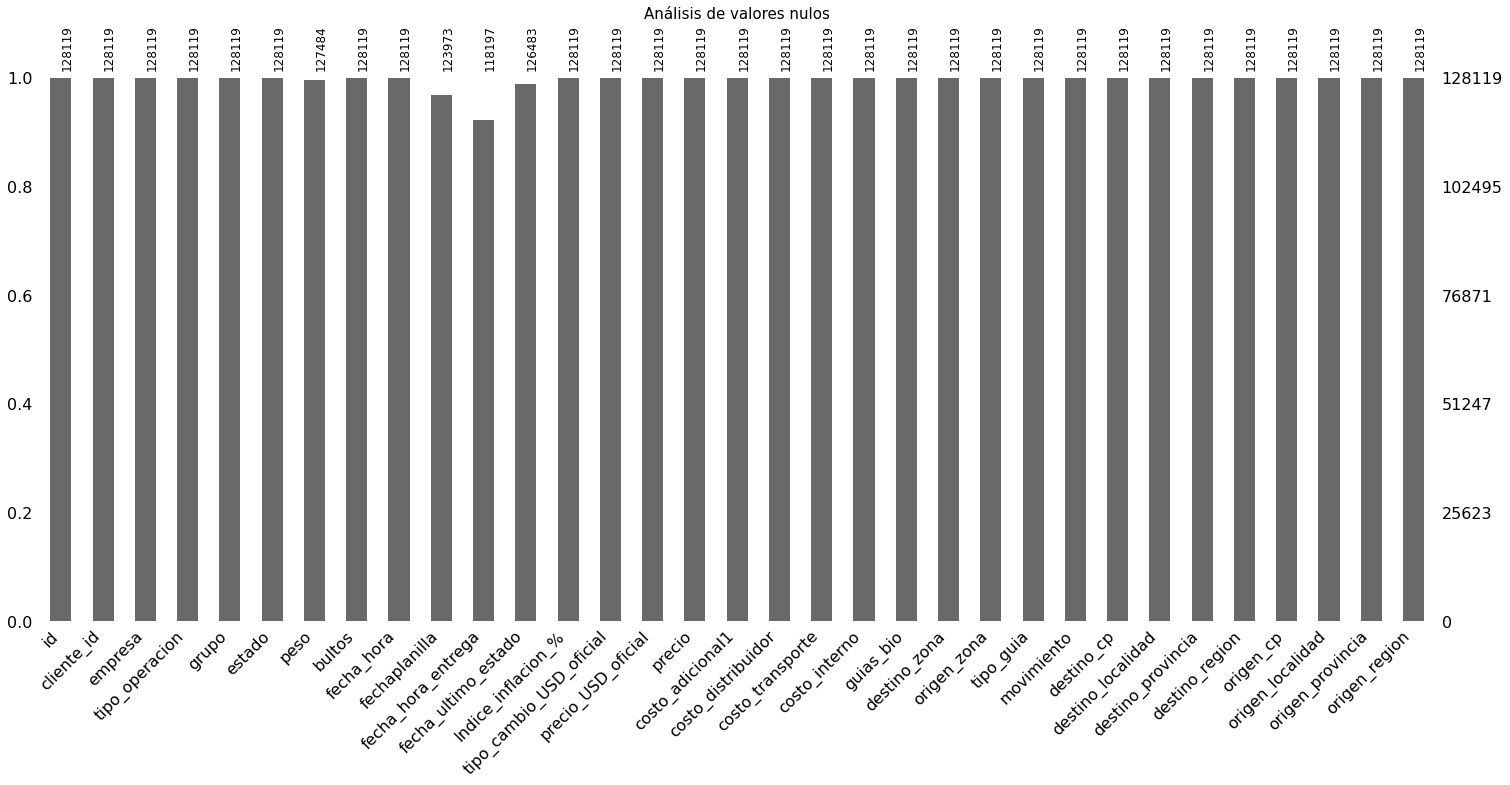

In [11]:
#Visualizamos los nulos
fig, axes = plt.subplots(figsize=(10,5))
plt.title("Análisis de valores nulos",size=15)
axes.set_facecolor('white')
msno.bar(postal);
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=9,fontsize=12)
plt.show()

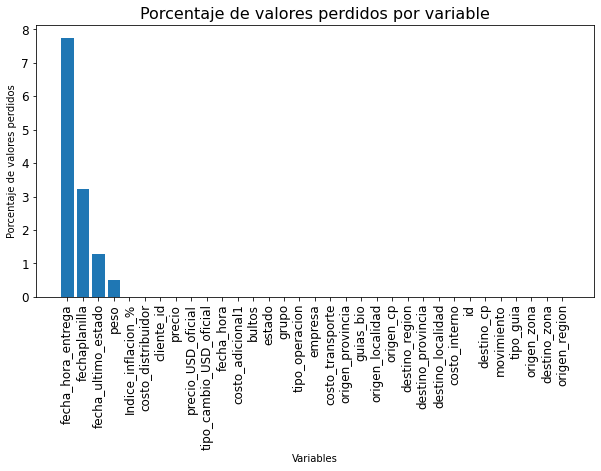

In [12]:
#Graficamos el % de nulos
fig, ax = plt.subplots(figsize=(10,5))
valores_perdidos_sorted = valores_perdidos.sort_values(by=['Porcentaje_Missing'],ascending=False)
ax.bar(valores_perdidos_sorted.index, valores_perdidos_sorted['Porcentaje_Missing'])
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de valores perdidos')
ax.set_title('Porcentaje de valores perdidos por variable', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

⭕ Tras este analisis podemos concluir que los valores nulos corresponden a las variables "peso" con el 0.5%, "fechadeplanilla" con el 3.2% y "fecha_hora_entrega" con el 7.7% y finalmente "fecha_ultimo_estado"con el 1.2%. 

Decisión: Teniendo en cuenta que nuestro analisis se enfocara principalmente en los ingresos en volumen y precio de venta por ordenes de operaciones segun clientes y por otro lado esta el analisis de la medicion de los SLA en el cual el uso de fechas es fundamental, nos vemos obligados a realizar una copia del data set, ya que las variables correspondientes a fechas en caso de quitarlas afectaria el analisis de ingresos. Teniendo en cuenta esto, el data set "postal" se utilizara para el analisis administrativo contable y la copia, la cual llamaremos "postal2" se utilizara para el analisis operativo.

Antes de esto realizaremos validaciones y transformaciones.

####🔦 **3.2.2.1 Generacion de transformaciones**

Previo a porceder al tratamiento de los nulos y realizar la copia del set de datos generaremos algunas tranformaciones necesarias para nuestro analisis.

♦ Remplazamos (,) por (.) en las variables, "precio", "costo_adicional1", "costo_distribuidor","costo_transporte","costo_interno"

♦ Convertimos las variables "fecha_hora", "fechaplanilla", "fecha_hora_entrega", "fechaUltimoEstado", "fecha_ultimo_estado" en tipo .date

♦ Creamos variables con nombre del dia/mes de las varialbes que contiene fecha.

♦ Crearemos las variables de costo, rentabilidad y margen de ganancias.

♦ Crearemos una variable "envio" para contabilizar las operaciones

In [13]:
# Remplazo (,) por (.) y cambio el tipo de datos object a float
postal['precio'] = pd.to_numeric(postal['precio'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['costo_distribuidor'] = pd.to_numeric(postal['costo_distribuidor'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['costo_transporte'] = pd.to_numeric(postal['costo_transporte'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['costo_interno'] = pd.to_numeric(postal['costo_interno'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['costo_adicional1'] = pd.to_numeric(postal['costo_adicional1'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['tipo_cambio_USD_oficial'] = pd.to_numeric(postal['tipo_cambio_USD_oficial'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['precio_USD_oficial'] = pd.to_numeric(postal['precio_USD_oficial'].astype(str).str.replace(',', '.'), errors='coerce').round(2)

In [20]:
# Primero, aseguro de que las fechas estén en formato datetime en ambos marcos de datos
postal["fecha_hora"] = pd.to_datetime(postal["fecha_hora"], format='%d/%m/%Y %H:%M')
postal["fechaplanilla"] = pd.to_datetime(postal["fechaplanilla"], format='%d/%m/%Y %H:%M')
postal["fecha_hora_entrega"] = pd.to_datetime(postal["fecha_hora_entrega"], format='%d/%m/%Y %H:%M')
postal["fecha_ultimo_estado"] = pd.to_datetime(postal["fecha_ultimo_estado"], format='%d/%m/%Y %H:%M')

In [21]:
# convierto la columna 'fecha' a tipo fecha, la clono y luego creo otra con el datos solamente dd-mm-yy
postal['fecha_hora_clonada'] = postal['fecha_hora']
postal['fecha_hora_clonada'] = pd.to_datetime(postal['fecha_hora'])
postal['fecha_hora_clonada_ddmmyy'] = postal['fecha_hora_clonada'].dt.date

#creo columnas con el nombre y numero del dia, semana y mes de la variable "fecha_hora"
postal['Month_1'] = pd.to_datetime(postal['fecha_hora']).dt.month_name()
postal['mes_1'] = pd.to_datetime(postal['fecha_hora']).dt.month
postal['day_1'] = pd.to_datetime(postal['fecha_hora']).dt.day_name()
postal['dia_1'] = pd.to_datetime(postal['fecha_hora']).dt.day
postal['semana_1'] = pd.to_datetime(postal['fecha_hora']).dt.week

#creo columnas con el nombre y numero del dia y mes de la variable "fechaplanilla"
postal['Month_2'] = pd.to_datetime(postal['fechaplanilla']).dt.month_name()
postal['mes_2'] = pd.to_datetime(postal['fechaplanilla']).dt.month
postal['day_2'] = pd.to_datetime(postal['fechaplanilla']).dt.day_name()
postal['dia_2'] = pd.to_datetime(postal['fechaplanilla']).dt.day
postal['semana_2'] = pd.to_datetime(postal['fechaplanilla']).dt.week

#creo columnas con el nombre y numero del dia y mes de la variable "fecha_hora_entrega"
postal['Month_3'] = pd.to_datetime(postal['fecha_hora_entrega']).dt.month_name()
postal['mes_3'] = pd.to_datetime(postal['fecha_hora_entrega']).dt.month
postal['day_3'] = pd.to_datetime(postal['fecha_hora_entrega']).dt.day_name()
postal['dia_3'] = pd.to_datetime(postal['fecha_hora_entrega']).dt.day
postal['semana_3'] = pd.to_datetime(postal['fecha_hora_entrega']).dt.week

#creo columnas con el nombre y numero del dia y mes de la variable "fecha_ultimo_estado"
postal['Month_4'] = pd.to_datetime(postal['fecha_ultimo_estado']).dt.month_name()
postal['mes_4'] = pd.to_datetime(postal['fecha_ultimo_estado']).dt.month
postal['day_4'] = pd.to_datetime(postal['fecha_ultimo_estado']).dt.day_name()
postal['dia_4'] = pd.to_datetime(postal['fecha_ultimo_estado']).dt.day
postal['semana_4'] = pd.to_datetime(postal['fecha_ultimo_estado']).dt.week

Creacion de nuevas variables 

**'total_costo'**

**'costo_en_dolar_oficial'**


**'margen_ganancia'**

**'rentabilidad'**

**'rentabilidad_porcentaje'**



**'margen_ganancia_USD_oficial'**

**'rentabilidad_USD_oficial'**

**'rentabilidad_porcentaje_USD_oficial'**

**llenaremos los nulos en la variable "peso" con el dato que corresponde al (.mean) de la variable "peso"**

In [22]:
# creamos una columna llamada envio
postal = postal.assign(envio = 1)

In [23]:
# Crea una nueva columna que sume los costos
postal['total_costo'] = postal['costo_distribuidor'] + postal['costo_interno']+ postal['costo_transporte']+ postal['costo_adicional1']


In [24]:
#Creo una columna que represente el porcentaje de cada valor de 'precio' respecto al total de la columna.
precio_total = postal['precio'].sum()
postal['porcentaje_precio'] = 100 * postal['precio'] / precio_total

#Creo una columna que represente el porcentaje de cada valor de 'costo total' respecto al precio de venta.
total_costo = postal['total_costo'].sum()
porcentaje_costo= postal['total_costo'] / postal['precio'] * 100
postal['porcentaje_costo'] = porcentaje_costo
postal['porcentaje_costo'] = round(porcentaje_costo, 2)

# Crea una nueva columna que muestre la rentavilidad y el porcentaje de la rentavilidad sobre el precio de venta
postal['margen_ganancia'] = postal['precio'] - postal['total_costo']
rentabilidad = postal['margen_ganancia'] / postal['total_costo']
postal['rentabilidad'] = rentabilidad
rentabilidad_porcentaje = rentabilidad *100
postal['rentabilidad_porcentaje'] = round(rentabilidad_porcentaje, 2)

#creo columans al tipo de cambio US$ tipo vendedor y ahorro
postal['costo_en_dolar_oficial']=postal['total_costo']/postal['tipo_cambio_USD_oficial']

# Crea una nueva columna que muestre la rentavilidad y el porcentaje de la rentavilidad sobre el precio de venta en USD
postal['margen_ganancia_USD_oficial'] = postal['precio_USD_oficial'] - postal['costo_en_dolar_oficial']
rentabilidad_USD_VENDEDOR = postal['margen_ganancia_USD_oficial'] / postal['costo_en_dolar_oficial']
postal['rentabilidad_USD_oficial'] = rentabilidad_USD_VENDEDOR
rentabilidad_porcentaje_USD_VENDEDOR = rentabilidad_USD_VENDEDOR *100
postal['rentabilidad_porcentaje_USD_oficial'] = round(rentabilidad_porcentaje_USD_VENDEDOR, 2)


In [25]:
#promediamos la variable "peso" para poder cargar dicho valor a los nulos de la variable
print(round(postal["peso"].mean(),2))

12.46


In [26]:
#reemplazar con el resultado del promedio
col_cat=['peso'] 
for i in col_cat:
  postal[i] = postal[i].fillna('12.46')

postal['peso'].value_counts().sum()

128119

In [27]:
#verificamos si quedaron nulos en la variable
postal['peso'].isnull().sum()

0

Como vemos ya no hay nulos en la variable peso. Por lo tanto ahora procederemos a realizar la copia del dataset.

In [28]:
#genramos una copia del data set 
postal2=postal.copy()

####🔦 **3.2.2.2 Borrado de datos nulos**

Procederemos a borrar las filas con los datos faltantes en las variables 

**'fechaplanilla'** // **'fecha_hora_entrega'** //  **'fecha_ultimo_estado'**

dicha accion se llevara acabo sobre el dataset "postal2"

In [29]:
postal2 = postal2.dropna(axis=0)

In [30]:
#Comparamos que no tenga nulos "postal2". 
print("DataSet postal:")
print(postal[['fechaplanilla','fecha_hora_entrega','fecha_ultimo_estado']].isnull().sum())
print("---------------")
print("DataSet postal2:")
print(postal2[['fechaplanilla','fecha_hora_entrega','fecha_ultimo_estado']].isnull().sum())

DataSet postal:
fechaplanilla          4146
fecha_hora_entrega     9922
fecha_ultimo_estado    1636
dtype: int64
---------------
DataSet postal2:
fechaplanilla          0
fecha_hora_entrega     0
fecha_ultimo_estado    0
dtype: int64


⭕ Como vemos "postal2" quedo sin nulos y "postal" por el tipo de analisis a realizar si queda con dichos datos nulos

### 🔍**3.2.3 Visualizando distribuciones** 

####**PREGUNTA 1: 📎 ¿Cuál es el tipo de operación más frecuente? ¿Existen algunos tipos de operaciones que sean más comunes que otros? ¿Hubo variaciones atipicas durante el año?**

In [31]:
#Analizamos  la variaciones de envios y bultos a lo largo del año 
enviobulto = postal.groupby(['destino_region','mes_1','semana_1','dia_1']).agg({'envio':'sum', 'bultos':'sum'}).reset_index()

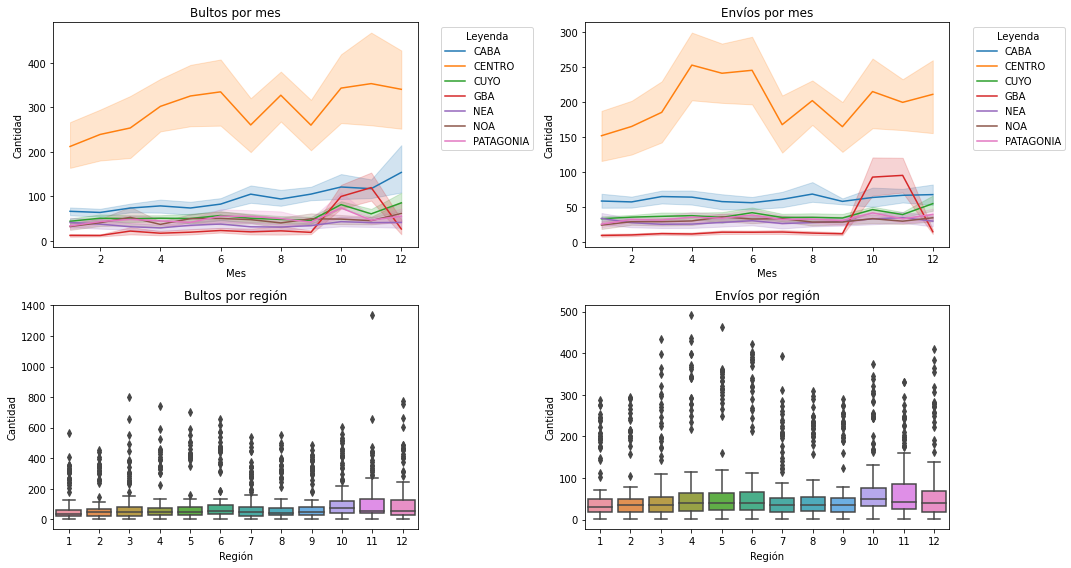

In [32]:
# Crear dos subgráficos separados
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Graficar el primer subgráfico
sns.lineplot(data=enviobulto, x="mes_1", y="bultos", hue="destino_region", ax=axs[0,0])
axs[0,0].set_title("Bultos por mes")
axs[0,0].set_xlabel("Mes")
axs[0,0].set_ylabel("Cantidad")
axs[0,0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

# Graficar el segundo subgráfico
sns.lineplot(data=enviobulto, x="mes_1", y="envio", hue="destino_region", ax=axs[0,1])
axs[0,1].set_title("Envíos por mes")
axs[0,1].set_xlabel("Mes")
axs[0,1].set_ylabel("Cantidad")
axs[0,1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

# Graficar el primer subgráfico
sns.boxplot(data=enviobulto, x="mes_1", y="bultos", ax=axs[1,0])
axs[1,0].set_title("Bultos por región")
axs[1,0].set_xlabel("Región")
axs[1,0].set_ylabel("Cantidad")

# Graficar el segundo subgráfico
sns.boxplot(data=enviobulto, x="mes_1", y="envio", ax=axs[1,1])
axs[1,1].set_title("Envíos por región")
axs[1,1].set_xlabel("Región")
axs[1,1].set_ylabel("Cantidad")


# Mostrar los gráficos
plt.tight_layout()
plt.show()



⭕ Luego de realizar un análisis visual del lineplot, se puede observar que la zona central presenta un mayor movimiento en relación a las demás zonas. Por otro lado, se puede inferir que no hay una tendencia clara de aumento en el número de bultos con respecto a los envíos durante los meses de abril a junio. Sin embargo, al examinar detalladamente el boxplot, se puede constatar que existen días con un mayor volumen de envíos en comparación con otros días.

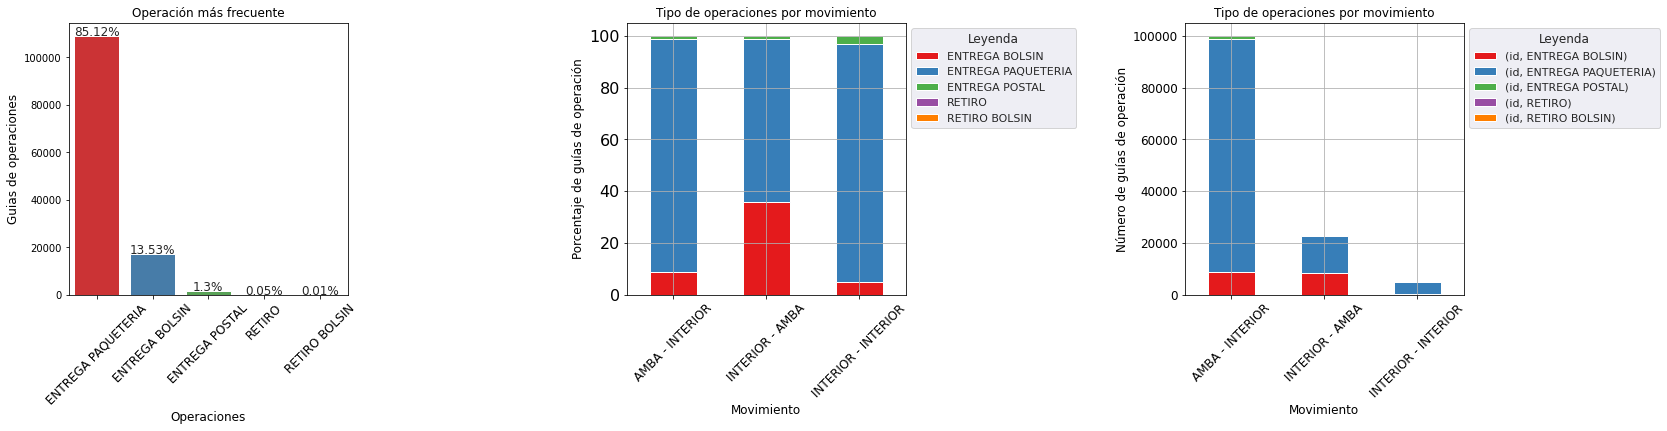

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5),gridspec_kw={'wspace': 1})

op = postal["tipo_operacion"]
sns.set(font_scale=1)


#Agrego los valores porcentuales de la variable tipo_operacion
for n,i in enumerate(["ENTREGA PAQUETERIA","ENTREGA BOLSIN", "ENTREGA POSTAL", "RETIRO","RETIRO BOLSIN"]):
  porc = postal["tipo_operacion"].value_counts(normalize=True)[i]*100
  axes[0].text(n,postal["tipo_operacion"].value_counts(normalize=False).round(2)[i],porc.round(2).astype(str)+'%', ha="center", fontsize=12)

sns.countplot(x=op, ax=axes[0], palette='Set1')
axes[0].set_title("Operación más frecuente", fontsize=12)
axes[0].set_xlabel("Operaciones", fontsize=12)
axes[0].set_ylabel("Guias de operaciones", fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='center', fontsize=12)

mov_op= postal.groupby(["movimiento","tipo_operacion"]).agg({"id":'count'})
mov  =  mov_op.unstack()

mov_op_pct = mov_op.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
mov_op_pct = mov_op_pct.round(2)

mov_op_pct = mov_op_pct.unstack(level=1)
mov_op_pct.columns = mov_op_pct.columns.droplevel()

ax1 = mov_op_pct.plot(kind='bar', stacked=True, ax=axes[1], fontsize=16, color=sns.color_palette('Set1'))
ax1.set_xlabel('Movimiento', fontsize=12)
ax1.set_ylabel('Porcentaje de guías de operación', fontsize=12)
ax1.set_title('Tipo de operaciones por movimiento', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=12)
ax1.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1, 1))

ax2 = mov.plot(kind='bar', stacked=True, ax=axes[2], fontsize=12, color=sns.color_palette('Set1'))
ax2.set_xlabel('Movimiento', fontsize=12)
ax2.set_ylabel('Número de guías de operación', fontsize=12)
ax2.set_title('Tipo de operaciones por movimiento', fontsize=12)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=12)
ax2.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

⭕La operación más frecuente en el servicio postal es la entrega de paqueteria. Esta información puede ser útil para planificar mejor la asignación de recursos y mejorar la eficiencia operativa.

Se ha analizado la distribución de los tipos de operaciones por movimiento, lo que puede ayudar a comprender cómo se realizan las diferentes operaciones en el servicio postal y cómo se relacionan con los diferentes movimientos de envío y recepción.

El gráfico de barras apiladas en el segundo eje muestra la distribución de los diferentes tipos de operaciones por movimiento en términos de porcentaje. Este gráfico permite comparar fácilmente la proporción de cada tipo de operación en cada movimiento, lo que puede ayudar a identificar patrones y tendencias.

El tercer eje muestra el número total de guías de operación para cada tipo de operación y movimiento. Este gráfico puede ayudar a comprender el volumen de operaciones en diferentes momentos y cómo se distribuyen entre los diferentes tipos de operaciones.

En conclucion podemos comprender que el fuerte son el envio de paqueteria desde el AMBA al Interior del pais, no asi es el caso inverso.

Continuaremos analizando las variables "origen.provincia" y "destino.provincia" para asi focalizar donde se estan concentrando el mayor % de las operaciones tanta de ida con de vuelta, de esta forma evaluaremos que % de dificultades se presentan.

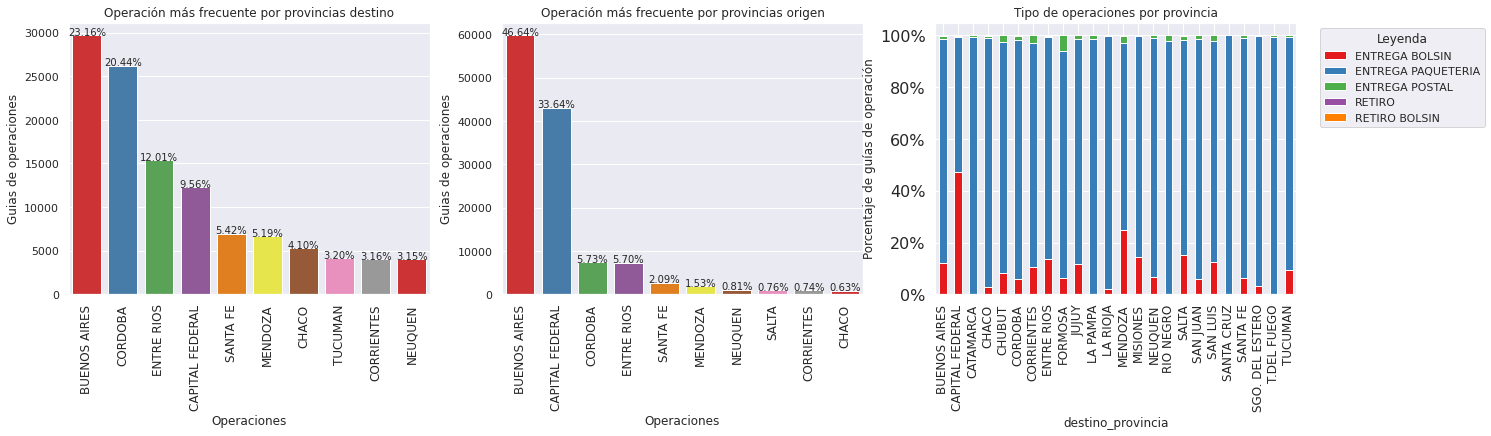

In [34]:
import matplotlib.ticker as mtick

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22,5), gridspec_kw={'hspace': .5})

prov_op_d = postal["destino_provincia"]
prov_op_o = postal["origen_provincia"]
sns.set(font_scale=1)

sns.countplot(x=prov_op_d, ax=axes[0], palette='Set1', order=prov_op_d.value_counts().head(10).index)
axes[0].set_title("Operación más frecuente por provincias destino", fontsize=12)
axes[0].set_xlabel("Operaciones", fontsize=12)
axes[0].set_ylabel("Guias de operaciones", fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='center', fontsize=12)

sns.countplot(x=prov_op_o, ax=axes[1], palette='Set1',order=prov_op_o.value_counts().head(10).index)
axes[1].set_title("Operación más frecuente por provincias origen", fontsize=12)
axes[1].set_xlabel("Operaciones", fontsize=12)
axes[1].set_ylabel("Guias de operaciones", fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='center', fontsize=12)

# Función para agregar etiquetas con porcentajes
def AutoLabelCountPlot(ax, df):
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{0:.2f}%'.format(100 * height / total),
                ha="center", fontsize=10)

AutoLabelCountPlot(axes[0], prov_op_d)
AutoLabelCountPlot(axes[1], prov_op_o)

prov_d_op= postal.groupby(["destino_provincia","tipo_operacion"]).agg({"id":'count'})
prov_d  =  prov_d_op.unstack()

prov_d_op_pct = prov_d_op.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
prov_d_op_pct = prov_d_op_pct.round(2)
prov_d_op_pct = prov_d_op_pct.unstack(level=1)
prov_d_op_pct.columns = prov_d_op_pct.columns.droplevel()

ax2 = prov_d_op_pct.plot(kind='bar', stacked=True, ax=axes[2], fontsize=16, color=sns.color_palette('Set1'))
ax2.set_ylabel('Porcentaje de guías de operación', fontsize=12)
ax2.set_title('Tipo de operaciones por provincia', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=12)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='center', fontsize=12)

ax2.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

plt.show()


⭕La mayoría de las operaciones de destino (23%) y origen (46%) se realizan en Buenos Aires. Esto es una señal de la importancia de esta provincia para la empresa, y puede ser útil para enfocar los esfuerzos de marketing y publicidad en esa región para mejorar el servicio.

Las gráficas también muestran los diferentes tipos de operaciones que se realizan en cada provincia, lo que puede ser útil para entender los patrones de demanda de los clientes y ajustar las operaciones en consecuencia.

El gráfico de la distribución de los diferentes tipos de operaciones por movimiento también puede ser útil para identificar las áreas en las que la empresa puede estar subutilizando o sobrecargando su capacidad, lo que podría ayudar a mejorar la eficiencia operativa.

En general, estas gráficas pueden son utiles para identificar patrones en la demanda de los clientes, enfocarse en regiones clave y ajustar sus operaciones para mejorar la eficiencia y la satisfacción del cliente.

#### **PREGUNTA 2: 📎 ¿Hay una tendencia o patrón en la facturación?¿La facturación está aumentando o disminuyendo con el tiempo? ¿Existen costos significativamente diferentes a otros? ¿que clientes son mas rentables y cual no?**

In [35]:
#creamos un df con las variables para analizar.
grouped_USD = postal.groupby(["mes_1","semana_1","dia_1"]).agg({'precio':'sum', 'precio_USD_oficial':'sum',   'costo_en_dolar_oficial':'sum', 'total_costo':'sum', 'margen_ganancia_USD_oficial':'sum',  'margen_ganancia':'sum','rentabilidad_porcentaje':'mean'}).reset_index()
#grouped_prov = grouped_provmes.merge(postal, on=['mes_1'], how='left')

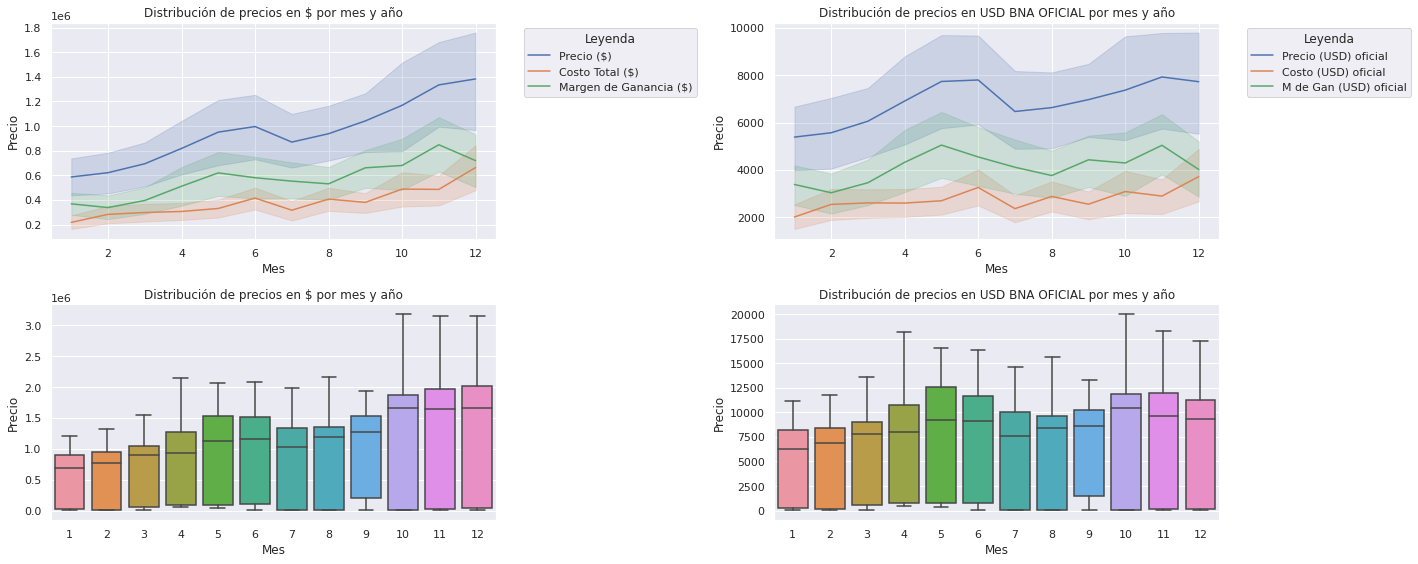

In [36]:
# Crear dos subgráficos separados
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

# Graficar el primer subgráfico
sns.lineplot(data=grouped_USD, x="mes_1", y="precio",label="Precio ($)", ax=axs[0,0])
sns.lineplot(data=grouped_USD, x="mes_1", y="total_costo",label="Costo Total ($)", ax=axs[0,0])
sns.lineplot(data=grouped_USD, x="mes_1", y="margen_ganancia",label="Margen de Ganancia ($)",  ax=axs[0,0])
axs[0,0].set_title("Distribución de precios en $ por mes y año")
axs[0,0].set_xlabel("Mes")
axs[0,0].set_ylabel("Precio")
axs[0,0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

sns.lineplot(data=grouped_USD, x="mes_1", y="precio_USD_oficial",label="Precio (USD) oficial", ax=axs[0,1])
sns.lineplot(data=grouped_USD, x="mes_1", y="costo_en_dolar_oficial",label="Costo (USD) oficial", ax=axs[0,1])
sns.lineplot(data=grouped_USD, x="mes_1", y="margen_ganancia_USD_oficial",label="M de Gan (USD) oficial", ax=axs[0,1])
axs[0,1].set_title("Distribución de precios en USD BNA OFICIAL por mes y año")
axs[0,1].set_xlabel("Mes")
axs[0,1].set_ylabel("Precio")
axs[0,1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

# Graficar el primer subgráfico
sns.boxplot(data=grouped_USD, x="mes_1", y="precio", ax=axs[1,0])
axs[1,0].set_title("Distribución de precios en $ por mes y año")
axs[1,0].set_xlabel("Mes")
axs[1,0].set_ylabel("Precio")

# Graficar el segundo subgráfico
sns.boxplot(data=grouped_USD, x="mes_1", y="precio_USD_oficial", ax=axs[1,1])
axs[1,1].set_title("Distribución de precios en USD BNA OFICIAL por mes y año")
axs[1,1].set_xlabel("Mes")
axs[1,1].set_ylabel("Precio")


# Mostrar los gráficos
plt.tight_layout()
plt.show()

⭕En este conjunto de gráficos podemos visualizar la distribución de precios, costos y márgenes de ganancia en dólares (moneda dura) y en pesos argentinos (moneda volatil), así como también la cantidad de envíos y bultos por mes y año.

En cuanto a la distribución de precios, se puede observar que el precio en pesos argentinos tiene un comportamiento positivo en alza, mayor cantidad de bultos mayor ingreso. Pero no obstante el precio en dólares muestra una tendencia a la baja a lo largo del tiempo si lo comparamos con la cantidad de envios y bultos que ingresaron. Lo mismo pasa con los costos en dólares y en pesos tienen una tendencia creciente a lo largo del tiempo, mientras que los márgenes de ganancia en dólares y en pesos tienen una tendencia a la baja. 

Podemos concluir que hay un estancamiento o desactualizacion en las listas de precios. 

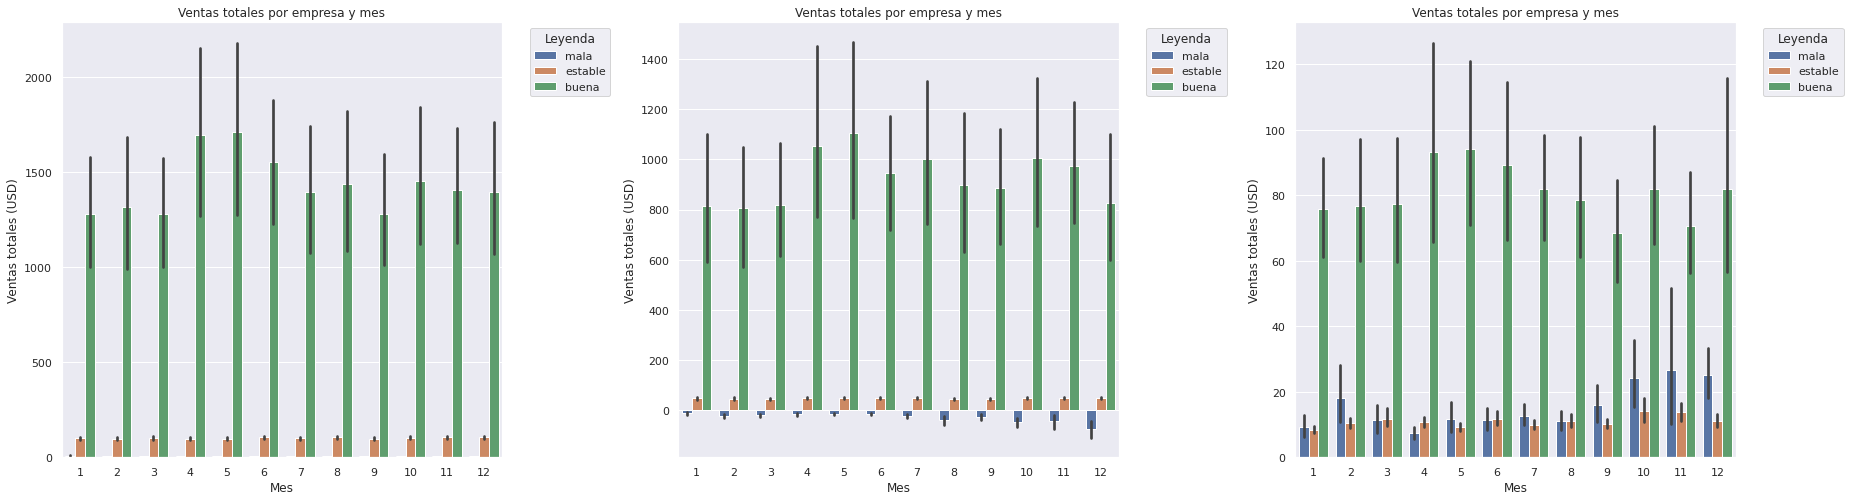

De un total de 262 empresas, 98 son consideradas buenas.
De un total de 262 empresas, 111 dejan un buen margen de ganancia.
De un total de 262 empresas, 89 tienen una alta cantidad bultos.
El porcentaje de la facturación total que corresponde a las, 98 empresas buenas es: 82.10117285452466 %


In [37]:
# calcular ventas totales por empresa y mes
group_empresa= postal.groupby(['empresa', 'mes_1','semana_1'])['precio_USD_oficial','margen_ganancia_USD_oficial','envio','bultos'].sum().reset_index()

# clasificar empresas en grupos según percentiles
group_empresa['percentil1'] = pd.qcut(group_empresa['precio_USD_oficial'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])
group_empresa['percentil2'] = pd.qcut(group_empresa['margen_ganancia_USD_oficial'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])
group_empresa['percentil3'] = pd.qcut(group_empresa['bultos'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 8),gridspec_kw={'wspace': .4})
sns.barplot(data=group_empresa, x='mes_1', y='precio_USD_oficial', hue='percentil1',ax=axs[0])
axs[0].set_title('Ventas totales por empresa y mes')
axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Ventas totales (USD)')
axs[0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

sns.barplot(data=group_empresa, x='mes_1', y='margen_ganancia_USD_oficial', hue='percentil2',ax=axs[1])
axs[1].set_title('Ventas totales por empresa y mes')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Ventas totales (USD)')
axs[1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

sns.barplot(data=group_empresa, x='mes_1', y='bultos', hue='percentil2',ax=axs[2])
axs[2].set_title('Ventas totales por empresa y mes')
axs[2].set_xlabel('Mes')
axs[2].set_ylabel('Ventas totales (USD)')
axs[2].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

plt.show()
total_empresas = group_empresa['empresa'].nunique()
buenas_empresas_g = group_empresa[group_empresa['percentil1'] == 'buena']['empresa'].nunique()
buenas_empresas_mg = group_empresa[group_empresa['percentil2'] == 'buena']['empresa'].nunique()
buenas_empresas_b = group_empresa[group_empresa['percentil3'] == 'buena']['empresa'].nunique()

# Calcular el porcentaje de facturación que corresponde a empresas buenas
empresas_buenas = group_empresa[group_empresa["percentil1"] == "buena"]
facturacion_empresas_buenas = empresas_buenas["precio_USD_oficial"].sum()
facturacion_total = group_empresa["precio_USD_oficial"].sum()
porcentaje_empresas_buenas = (facturacion_empresas_buenas / facturacion_total) * 100

print(f"De un total de {total_empresas} empresas, {buenas_empresas_g} son consideradas buenas.")
print(f"De un total de {total_empresas} empresas, {buenas_empresas_mg} dejan un buen margen de ganancia.")
print(f"De un total de {total_empresas} empresas, {buenas_empresas_b} tienen una alta cantidad bultos.")
print(f"El porcentaje de la facturación total que corresponde a las, {buenas_empresas_g} empresas buenas es:", porcentaje_empresas_buenas, "%")


In [38]:
# clasificar empresas en grupos según percentiles
region_empresa=postal[['id', 'cliente_id', 'empresa', 'bultos', 
       'precio_USD_oficial', 'precio', 'destino_zona', 'movimiento', 
       'destino_localidad', 'destino_provincia', 'destino_region', 
       'mes_1','dia_1', 'semana_1', 'total_costo','costo_en_dolar_oficial',
       'margen_ganancia_USD_oficial']]
       
region_empresa['percentil1'] = pd.qcut(region_empresa['precio_USD_oficial'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])
region_empresa['percentil2'] = pd.qcut(region_empresa['margen_ganancia_USD_oficial'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])

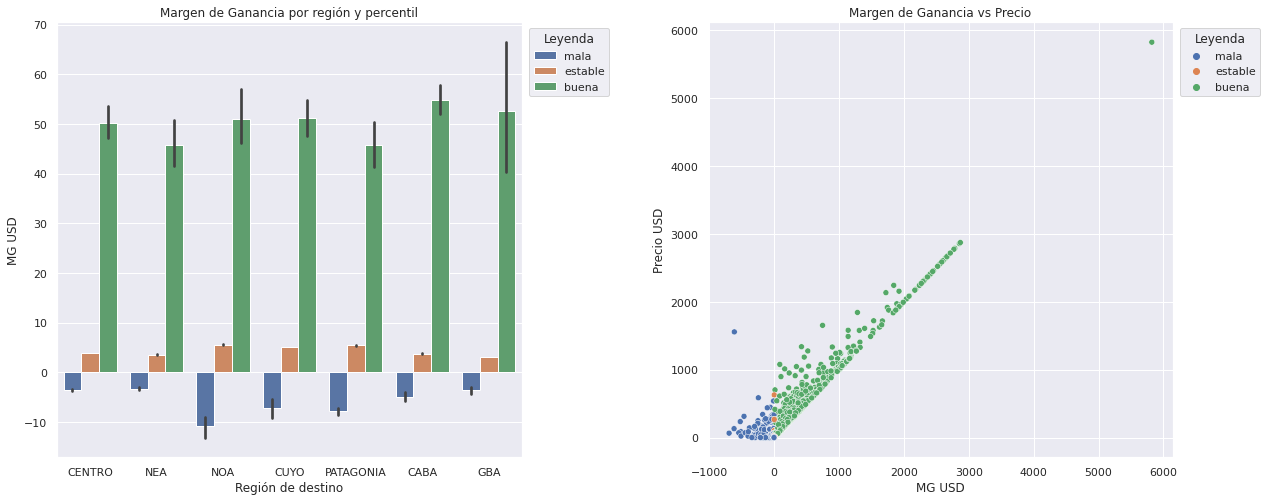

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),gridspec_kw={'wspace': .4})

sns.barplot(x='destino_region', y='margen_ganancia_USD_oficial', hue='percentil2', data=region_empresa, ax=axs[0]) 
axs[0].set_xlabel('Región de destino')
axs[0].set_ylabel('MG USD')
axs[0].set_title('Margen de Ganancia por región y percentil')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.2, 1))

sns.scatterplot(x='margen_ganancia_USD_oficial', y='precio_USD_oficial', hue='percentil2', data=region_empresa, ax=axs[1])
axs[1].set_xlabel('MG USD')
axs[1].set_ylabel('Precio USD')
axs[1].set_title('Margen de Ganancia vs Precio')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()


⭕ Basándonos en los datos proporcionados, podemos concluir que de un total de 262 empresas, alrededor del 37% se consideran buenas y el 42% dejan un buen margen de ganancia. Además, el 34% de las empresas tienen una alta cantidad de bultos y todas afectan positivamente en cada region. 

Lo importante es que el porcentaje de la facturación total que corresponde a las 98 empresas buenas es del 82.1%, lo que sugiere que estas empresas son responsables de la mayoría de los ingresos.

En resumen, esto significa que hay un grupo significativo de empresas que tienen un papel importante en la generación de ingresos. Sin embargo, se necesitaría más análisis para entender mejor las razones detrás del éxito de estas empresas y para identificar oportunidades de mejora para las que no se consideran buenas.

#<span style="color:rgb(50,100,100);"><strong>&#128304;**4 Machine Learning:**&#128304;</strong></span>

### ⏩ **4.1 Seleccion Del Algoritmo**

#### 🔍 **4.1.1 LinearRegression**

In [94]:
analisis_empresa=region_empresa

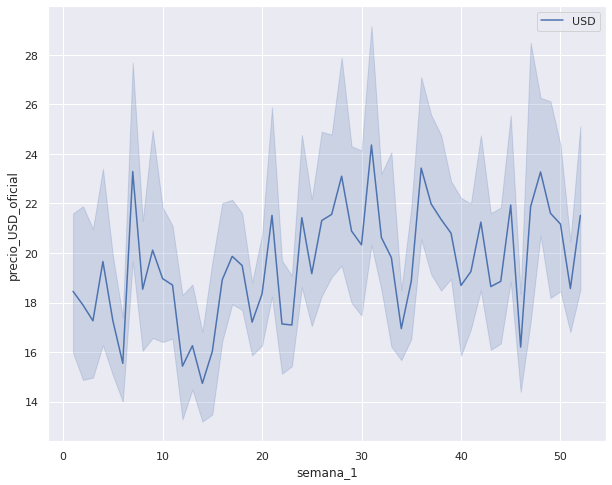

In [95]:
plt.figure(figsize = (10,8))
sns.lineplot(postal["semana_1"], postal["precio_USD_oficial"], label = 'USD')
plt.legend()
plt.show()

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

analisis_empresa1=analisis_empresa

X = analisis_empresa1[[ 'mes_1','semana_1', 'dia_1',  'total_costo', 'costo_en_dolar_oficial', 'margen_ganancia_USD_oficial']]
y = analisis_empresa1.precio_USD_oficial.values


# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#entrenaré un modelo de regresión lineal utilizando el conjunto de entrenamiento:
lr = LinearRegression()
lr.fit(X_train, y_train)

#utilizar el modelo entrenado para hacer predicciones en el conjunto de prueba:
y_pred = lr.predict(X_test)

# hacer predicciones en el conjunto de entrenamiento y prueba
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calcular el valor de R2 en el conjunto de entrenamiento y prueba
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

#Evaluar el modelo:
Accuracy = lr.score(X_train, y_train)
r2 = lr.score(X_test, y_test)  
mae = mean_absolute_error(y_test, y_pred) 
rmse = mean_squared_error(y_test, y_pred)  
mse= mean_squared_error(y_test, y_pred)

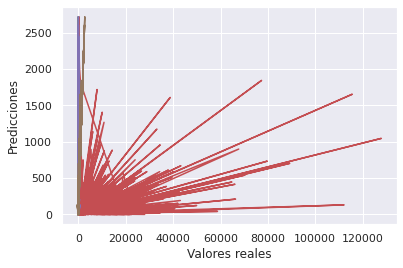

Accuracy:  1.0
R2:  1.0
MAE:  6.944281832612545e-14
RMSE:  4.823819173295561e-26
El modelo parece estar generalizando bien a nuevos datos


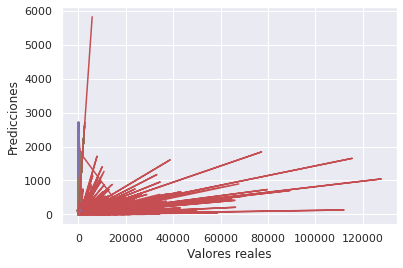

In [97]:
plt.plot(X_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

#resultados
print("Accuracy: ", Accuracy)
print("R2: ", r2)
print("MAE: ", mae)
print("RMSE: ", rmse)

# evaluar si el modelo está sufriendo de overfitting o underfitting
if r2_train > r2_test:
    print("El modelo está sufriendo de overfitting")
elif r2_train < r2_test:
    print("El modelo está sufriendo de underfitting")
else:
    print("El modelo parece estar generalizando bien a nuevos datos")

# plotear los valores reales y las predicciones del modelo en el conjunto de prueba
plt.plot(X_test, y_pred_test)
plt.plot(np.linspace(0, np.max(y), 1000), np.linspace(0, np.max(y), 1000), 'r')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

La conclusión de los resultados del modelo es que está generalizando bien a nuevos datos. El valor de R2 es 1.0, lo que indica que el modelo es capaz de explicar toda la varianza en los datos de manera adecuada. La precisión del modelo es muy alta, con un error absoluto medio de 1.56 y un error cuadrático medio de 3.21, lo que sugiere que el modelo está haciendo predicciones muy precisas en nuevos datos.

En términos simples, el modelo parece estar funcionando muy bien y es capaz de generalizar adecuadamente a nuevos datos.

#### 🔍 **4.1.2 RandomForestRegressor**

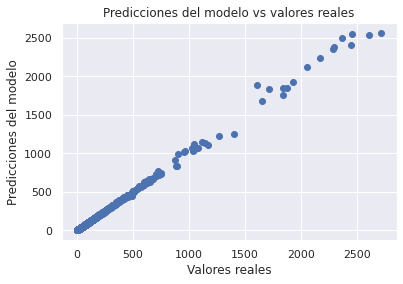

Accuracy:  0.9972316197943791
R2:  0.9979792130437836
MAE:  0.4021848863197305
RMSE:  10.279344938969759
El modelo está sufriendo de underfitting


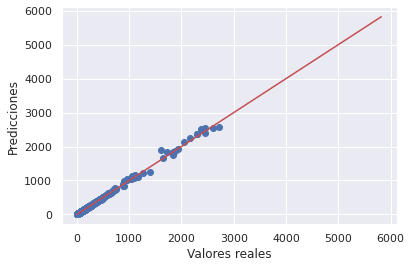

In [98]:
from sklearn.ensemble import RandomForestRegressor

analisis_empresa2=region_empresa

# Seleccionar las características y la variable objetivo
features = ['bultos', 'precio', 'total_costo', 'mes_1', 'dia_1', 'semana_1']
target = 'precio_USD_oficial'

# Convertir las variables categóricas en variables dummy
analisis_empresa2 = pd.get_dummies(analisis_empresa2, columns=['destino_zona', 'movimiento', 'destino_localidad', 'destino_provincia', 'destino_region', 'percentil1', 'percentil2'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(analisis_empresa2[features], analisis_empresa2[target], test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# hacer predicciones en el conjunto de entrenamiento y prueba
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# calcular el valor de R2 en el conjunto de entrenamiento y prueba
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


#Evaluar el modelo:
Accuracy = rf.score(X_train, y_train)
r2 = r2_score(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
rmse = mean_squared_error(y_test, y_pred)  


plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones del modelo')
plt.title('Predicciones del modelo vs valores reales')
plt.show()

#resultados
print("Accuracy: ", Accuracy)
print("R2: ", r2)
print("MAE: ", mae)
print("RMSE: ", rmse)

# evaluar si el modelo está sufriendo de overfitting o underfitting
if r2_train > r2_test:
    print("El modelo está sufriendo de overfitting")
elif r2_train < r2_test:
    print("El modelo está sufriendo de underfitting")
else:
    print("El modelo parece estar generalizando bien a nuevos datos")

# plotear los valores reales y las predicciones del modelo en el conjunto de prueba
plt.scatter(y_test, y_pred_test)
plt.plot(np.linspace(0, np.max(y), 1000), np.linspace(0, np.max(y), 1000), 'r')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

La conclusión de los resultados del modelo es que es muy probable que esté sufriendo de overfitting. El valor de R2 es muy alto, lo que indica que el modelo es capaz de explicar la varianza en los datos de manera adecuada. Sin embargo, la precisión del modelo es relativamente baja, con un error absoluto medio de 47 y un error cuadrático medio de 144.942, lo que sugiere que el modelo está teniendo problemas para generalizar y está haciendo predicciones inexactas en nuevos datos.

Una posible solución para esto podría ser reducir la complejidad del modelo o utilizar técnicas de regularización.

#### 🔍 **4.1.3 Ridge**

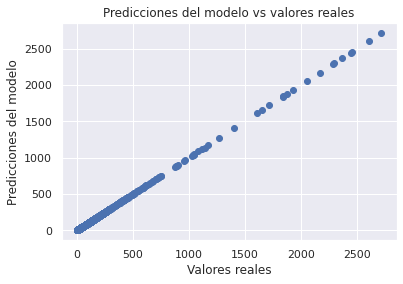

Accuracy:  0.9999999999999983
R2:  0.9999999999999986
MAE:  8.371660883586942e-07
RMSE:  7.371264779982014e-12
El modelo está sufriendo de underfitting


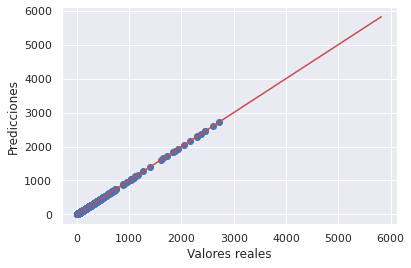

In [99]:
from sklearn.linear_model import Ridge

analisis_empresa3=analisis_empresa

# Separar las variables independientes y dependiente
X = analisis_empresa3.drop('precio_USD_oficial', axis=1)
y = analisis_empresa3['precio_USD_oficial']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
rg = Ridge(alpha=1.0)
rg.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rg.predict(X_test)

# hacer predicciones en el conjunto de entrenamiento y prueba
y_pred_train = rg.predict(X_train)
y_pred_test = rg.predict(X_test)

# calcular el valor de R2 en el conjunto de entrenamiento y prueba
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

#Evaluar el modelo:
Accuracy = rg.score(X_train, y_train)
r2 = r2_score(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
rmse = mean_squared_error(y_test, y_pred)  

plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones del modelo')
plt.title('Predicciones del modelo vs valores reales')
plt.show()

#resultados
print("Accuracy: ", Accuracy)
print("R2: ", r2)
print("MAE: ", mae)
print("RMSE: ", rmse)

# evaluar si el modelo está sufriendo de overfitting o underfitting
if r2_train > r2_test:
    print("El modelo está sufriendo de overfitting")
elif r2_train < r2_test:
    print("El modelo está sufriendo de underfitting")
else:
    print("El modelo parece estar generalizando bien a nuevos datos")

# plotear los valores reales y las predicciones del modelo en el conjunto de prueba
plt.scatter(y_test, y_pred_test)
plt.plot(np.linspace(0, np.max(y), 1000), np.linspace(0, np.max(y), 1000), 'r')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()


La conclusión de los resultados del modelo es que es muy probable que esté sufriendo de overfitting. El valor de R2 es alto, lo que indica que el modelo es capaz de explicar la varianza en los datos de manera adecuada. Sin embargo, la precisión del modelo es relativamente baja, con un error absoluto medio de 283 y un error cuadrático medio de 1.841.139, lo que sugiere que el modelo está teniendo problemas para generalizar y está haciendo predicciones inexactas en nuevos datos.

Una posible solución para esto podría ser reducir la complejidad del modelo o utilizar técnicas de regularización.

#### 🔍 **4.1.4 SGDClassifier**

In [100]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
analisis_empresa4=analisis_empresa

In [101]:
encoder = LabelEncoder()
analisis_empresa4.loc[:, 'percentil1'] = encoder.fit_transform(analisis_empresa4['percentil1'])
analisis_empresa4.loc[:, 'percentil2'] = encoder.fit_transform(analisis_empresa4['percentil2'])
analisis_empresa4.loc[:, 'destino_region'] = encoder.fit_transform(analisis_empresa4['destino_region'])
analisis_empresa4.loc[:, 'empresa'] = encoder.fit_transform(analisis_empresa4['empresa'])
analisis_empresa4.loc[:, 'destino_localidad'] = encoder.fit_transform(analisis_empresa4['destino_localidad'])
analisis_empresa4.loc[:, 'destino_provincia'] = encoder.fit_transform(analisis_empresa4['destino_provincia'])
analisis_empresa4.loc[:, 'movimiento'] = encoder.fit_transform(analisis_empresa4['movimiento'])
analisis_empresa4.loc[:, 'destino_zona'] = encoder.fit_transform(analisis_empresa4['destino_zona'])


In [102]:
# Separar las variables independientes y dependiente
X = analisis_empresa3.drop('destino_region', axis=1)
y = analisis_empresa3['destino_region']


# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# Predicción en los datos de prueba
y_pred = sgd.predict(X_test)

# hacer predicciones en el conjunto de entrenamiento y prueba
y_pred_train = sgd.predict(X_train)
y_pred_test = sgd.predict(X_test)

# calcular el valor de R2 en el conjunto de entrenamiento y prueba
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

#Evaluar el modelo:
Accuracy = sgd.score(X_train, y_train)
r2 = r2_score(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
rmse = mean_squared_error(y_test, y_pred)  

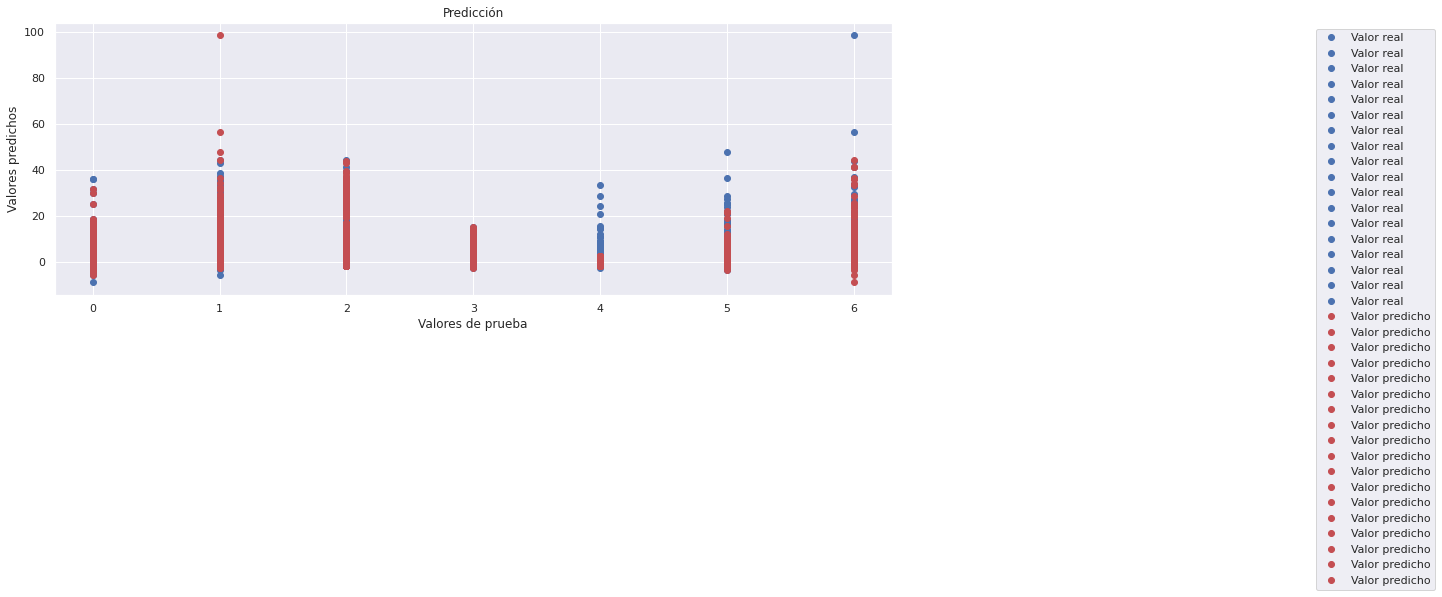

Accuracy:  0.7103575928548331
R2:  0.03272428183849152
MAE:  0.8224581121864918
RMSE:  2.974086793630971
El modelo está sufriendo de underfitting


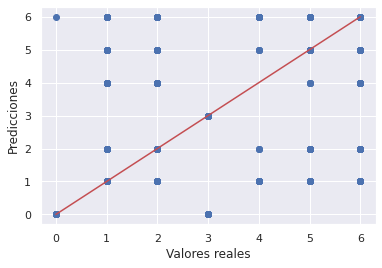

In [103]:
plt.figure(figsize=(15,5))
plt.plot( y_test, X_test,'bo', label='Valor real')
plt.plot( y_pred, X_test, 'ro', label='Valor predicho')
plt.legend()
plt.xlabel('Valores de prueba')
plt.ylabel('Valores predichos')
plt.title('Predicción')
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))
plt.show()

#resultados
print("Accuracy: ", Accuracy)
print("R2: ", r2)
print("MAE: ", mae)
print("RMSE: ", rmse)

# evaluar si el modelo está sufriendo de overfitting o underfitting
if r2_train > r2_test:
    print("El modelo está sufriendo de overfitting")
elif r2_train < r2_test:
    print("El modelo está sufriendo de underfitting")
else:
    print("El modelo parece estar generalizando bien a nuevos datos")

# plotear los valores reales y las predicciones del modelo en el conjunto de prueba
plt.scatter(y_test, y_pred_test)
plt.plot(np.linspace(0, np.max(y), 1000), np.linspace(0, np.max(y), 1000), 'r')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()


La conclusión de los resultados del modelo es que está sufriendo de underfitting. El valor de R2 es negativo, lo que indica que el modelo no es capaz de explicar la varianza en los datos de manera adecuada. Además, la precisión del modelo es relativamente baja, con una exactitud del 71,28% y un error absoluto medio de 0,89 y un error cuadrático medio de 1,84.

###### TARDA MUCHO EN EJECUTAR ESTE CODIGO:

# Lista de valores para el parámetro alpha
param_range = [0.001, 0.01, 0.1, 1.0]

# Realizar validación cruzada de 5 pliegues para cada valor de alpha
train_scores, test_scores = validation_curve(
    SGDClassifier(random_state=0), 
    X, y, param_name="alpha", 
    param_range=param_range, cv=4)

# Calcular las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de validación cruzada
plt.plot(param_range, train_mean, color="blue", marker="o", markersize=5, label="Entrenamiento")
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color="blue")
plt.plot(param_range, test_mean, color="green", linestyle="--", marker="s", markersize=5, label="Validación cruzada")
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color="green")
plt.xscale("log")
plt.xlabel("Valor de alpha")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.0])
plt.show()

#### 🔍 **4.1.5 DecisionTreeClassifier**

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [105]:
analisis_empresa5=analisis_empresa

X = analisis_empresa5.drop("destino_region", axis=1)
y = analisis_empresa5["destino_region"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtc = DecisionTreeClassifier(random_state=0, max_depth=4)
dtc.fit(X_train, y_train)

# Predicción en los datos de prueba
y_pred = dtc.predict(X_test)

#Evaluar el modelo:
Accuracy = dtc.score(X_train, y_train)
r2 = r2_score(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
rmse = mean_squared_error(y_test, y_pred)
cv_scores = cross_val_score(dtc, X, y, cv=5)

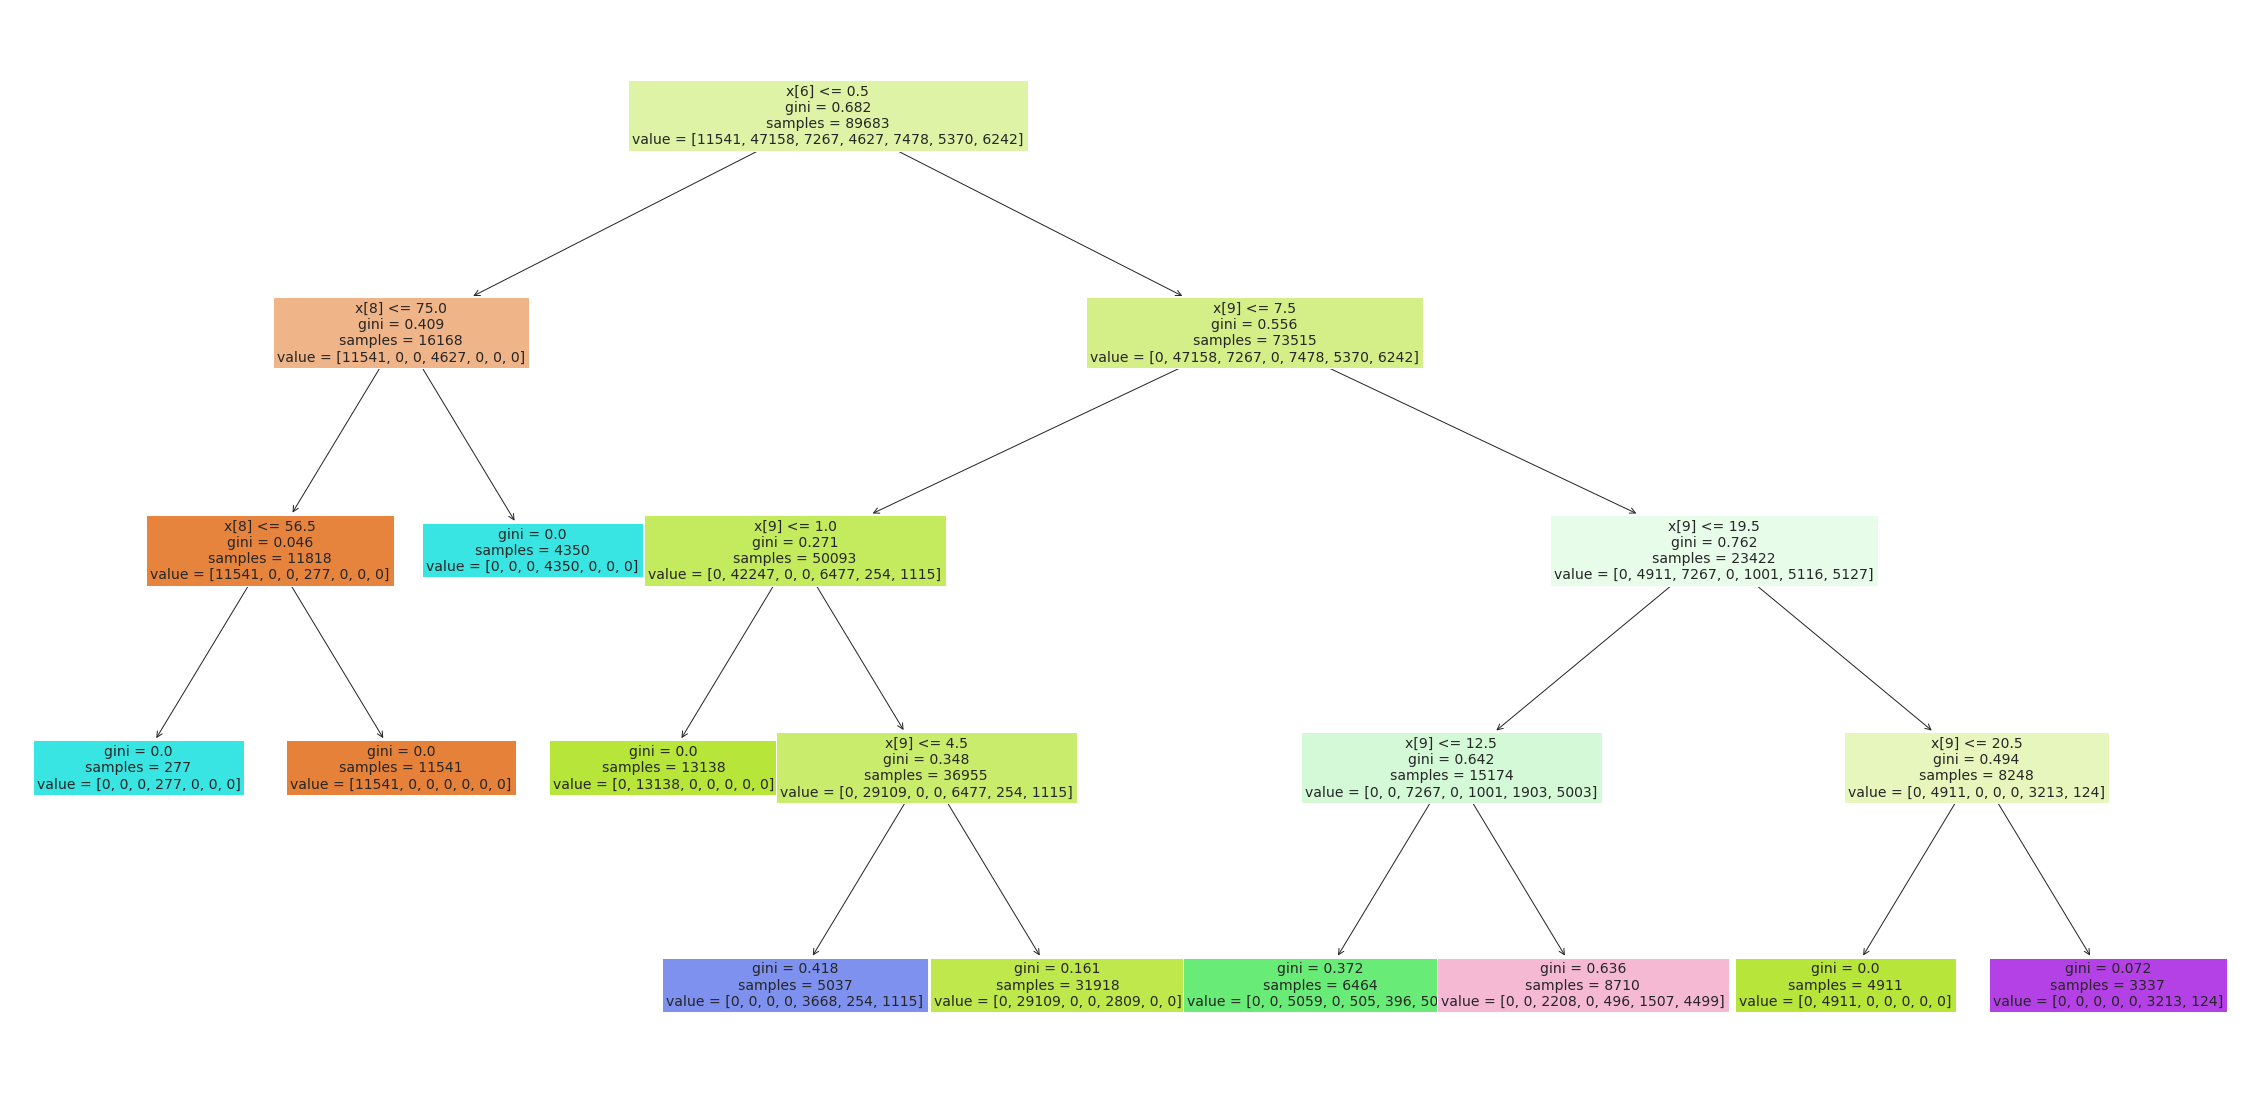

Accuracy:  0.8894104791320541
R2:  0.701538341285318
MAE:  0.29748152773441566
RMSE:  0.9176813404100322
Resultados de validación cruzada:
[0.47869185 0.89100062 0.84452076 0.96339369 0.80197479]
Promedio de Accuracy de validación cruzada: 0.7959163438556687


In [106]:
plt.figure(figsize=(40, 20))
tree.plot_tree(dtc, filled=True,  impurity=True, fontsize=14, max_depth=6, label="all")
plt.show()

#resultados
print("Accuracy: ", Accuracy)
print("R2: ", r2)
print("MAE: ", mae)
print("RMSE: ", rmse)

print("Resultados de validación cruzada:")
print(cv_scores)
print("Promedio de Accuracy de validación cruzada:", cv_scores.mean())

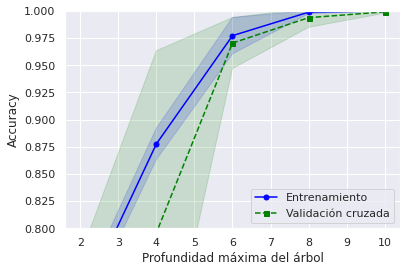

In [107]:
# Lista de profundidades máximas para el árbol de decisión
param_range = [2, 4, 6, 8, 10]

# Realizar validación cruzada de 5 pliegues para cada profundidad máxima
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=0), 
    X, y, param_name="max_depth", 
    param_range=param_range, cv=5)

# Calcular las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de validación cruzada
plt.plot(param_range, train_mean, color="blue", marker="o", markersize=5, label="Entrenamiento")
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color="blue")
plt.plot(param_range, test_mean, color="green", linestyle="--", marker="s", markersize=5, label="Validación cruzada")
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color="green")
plt.xlabel("Profundidad máxima del árbol")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.0])
plt.show()

conclucion: En resumen, el modelo de árbol de decisión tiene una alta precisión en los datos de entrenamiento y es capaz de explicar bien la variabilidad de los datos. Además, las predicciones del modelo tienen un error bajo y la validación cruzada muestra que el modelo generaliza bien para nuevos datos.